# Support Vector Machine
It is a supervised classification algorithm in which we create a line(Hyperplane) which best separates the n-dimensional data into classes.
SVM chooses the extreme points/vectors that help in creating the hyperplane.

![Img](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

## Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv("./Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot:>

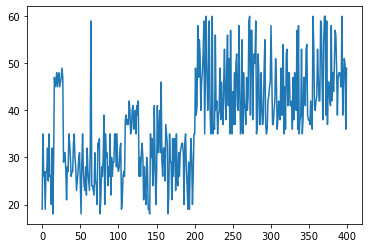

In [6]:
df["Age"].plot()

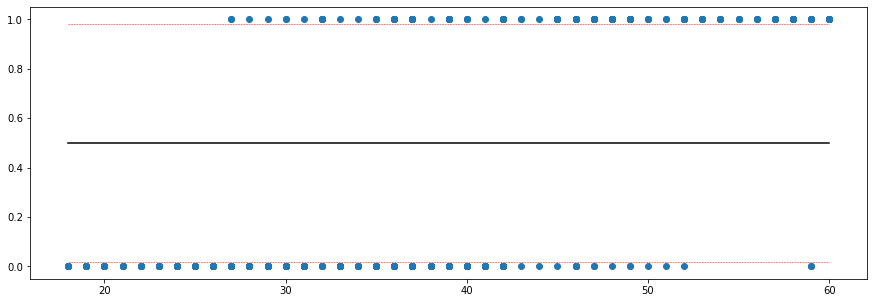

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df["Age"], df["Purchased"]);

# Hyperplane
ax.plot([df["Age"].min(), df["Age"].max()], [0.5, 0.5], c="black")
# Positive Hyperplane
ax.plot([df["Age"].min(), df["Age"].max()], [0.98, 0.98], c="red", ls="--",  linewidth=0.5)
# Negative Hyperplane
ax.plot([df["Age"].min(), df["Age"].max()], [0.02, 0.02], c="red", ls="--",  linewidth=0.5);

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [6]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Split Dataset into Train and Test set

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X_train.shape, X_test.shape

((300, 2), (100, 2))

In [9]:
y_train.shape, y_test.shape

((300,), (100,))

## Feature Scalling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled[:5]

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926]])

In [12]:
X_test_scaled[:5]

array([[ 0.812419  , -1.39920777],
       [ 2.0889839 ,  0.52871943],
       [-0.95513241, -0.75656537],
       [ 1.0088136 ,  0.76240757],
       [-0.85693511, -1.22394166]])

## Training SVM model

In [13]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", random_state=42)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
classifier.score(X_test_scaled, y_test)

0.86

## Predicting on Test Data

In [15]:
y_p = classifier.predict(X_test_scaled)

In [16]:
y_p

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [17]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_p)

array([[61,  2],
       [12, 25]], dtype=int64)